-----

------

# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Entiendo que en general el plan ultimate es el mas costoso con respecto el plan surf, cada uno tiene costos adicionales cuando se le agota el plan, en este sentido es más economico el plan ultimate frente al surf

## Corregir datos

[Corrige los problemas obvios con los datos basándote en las observaciones iniciales.]

In [5]:
plans['plan_name'] = plans['plan_name'].astype('string')
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      string 
dtypes: float64(2), int64(5), string(1)
memory usage: 256.0 bytes


## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users.head(10)


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Aqui veo casi los datos limpios, solo queda cambiar la columna reg_date y churn_date el tipo de datos object a datetime, y la columna churn_date encontramos mayor parte de valores ausentes

### Corregir los datos

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


## Llamadas

In [9]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
# Imprime una muestra de datos para las llamadas
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


Listo en la tabla calls o llamadas, solo veo que en la columna call_date esta en tipo object, lo que debemos es pasar a tipo datetime

### Corregir los datos

In [11]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


## Mensajes

In [12]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [13]:
# Imprime una muestra de datos para los mensajes
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


En este caso pasa lo mismo debo cambiar el tipado de object a datetime en la columna message_date

### Corregir los datos

In [14]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


## Internet

In [15]:
# Imprime la información general/resumida sobre el DataFrame de internet
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Imprime una muestra de datos para el tráfico de internet
internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


En esta tabla debo cambiar el tipado de la columna session_date

### Corregir los datos

In [17]:
internet['session_date']= pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

## Estudiar las condiciones de las tarifas

In [18]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
for index, row in plans.iterrows():
    print(f"\nTarifa {row['plan_name'].upper()}:")
    print(f"- Pago Mensual: ${row['usd_monthly_pay']}")
    print(f"- Incluye:")
    print(f"- Megabytes: {row['mb_per_month_included']} mb")
    print(f"- Minutos: {row['minutes_included']}")


Tarifa SURF:
- Pago Mensual: $20
- Incluye:
- Megabytes: 15360 mb
- Minutos: 500

Tarifa ULTIMATE:
- Pago Mensual: $70
- Incluye:
- Megabytes: 30720 mb
- Minutos: 3000


## Agregar datos por usuario


In [19]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
calls.head()
calls['year_month']= calls['call_date'].dt.to_period('M')
no_llamadas = calls.groupby(['user_id','year_month']).size()
print(no_llamadas)

user_id  year_month
1000     2018-12       16
1001     2018-08       27
         2018-09       49
         2018-10       65
         2018-11       64
                       ..
1498     2018-12       39
1499     2018-09       41
         2018-10       53
         2018-11       45
         2018-12       65
Length: 2258, dtype: int64


In [20]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
calls.head()
minutos_usados = calls.groupby(['user_id','year_month'])['duration'].sum()
print(minutos_usados)

user_id  year_month
1000     2018-12       116.83
1001     2018-08       171.14
         2018-09       297.69
         2018-10       374.11
         2018-11       404.59
                        ...  
1498     2018-12       324.77
1499     2018-09       330.37
         2018-10       363.28
         2018-11       288.56
         2018-12       468.10
Name: duration, Length: 2258, dtype: float64


In [21]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
messages.head()
messages['year_month'] = messages['message_date'].dt.to_period('M')
messages_per_user= messages.groupby(['user_id','year_month']).size()
print(messages_per_user)

user_id  year_month
1000     2018-12       11
1001     2018-08       30
         2018-09       44
         2018-10       53
         2018-11       36
                       ..
1496     2018-09       21
         2018-10       18
         2018-11       13
         2018-12       11
1497     2018-12       50
Length: 1806, dtype: int64


In [22]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
internet.head()
internet['mes_inter'] = internet['session_date'].dt.to_period('M')
traffic_per_user = internet.groupby(['user_id','mes_inter'])['mb_used'].sum()
print(traffic_per_user)

user_id  mes_inter
1000     2018-12       1901.47
1001     2018-08       6919.15
         2018-09      13314.82
         2018-10      22330.49
         2018-11      18504.30
                        ...   
1498     2018-12      23137.69
1499     2018-09      12984.76
         2018-10      19492.43
         2018-11      16813.83
         2018-12      22059.21
Name: mb_used, Length: 2277, dtype: float64


In [23]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
resultado = pd.concat([
    no_llamadas.rename('calls'),
    minutos_usados.rename('minutes'),
    messages_per_user.rename('messages'),
    traffic_per_user.rename('internet')
], axis=1)
resultado['minutes'] = np.ceil(resultado['minutes'])
resultado['internet'] = np.ceil(resultado['internet']/1024)
resultado = resultado.rename_axis(index=['user_id', 'anio_mes'])
resultado = resultado.reset_index()
print(resultado)

      user_id anio_mes  calls  minutes  messages  internet
0        1000  2018-12   16.0    117.0      11.0       2.0
1        1001  2018-08   27.0    172.0      30.0       7.0
2        1001  2018-09   49.0    298.0      44.0      14.0
3        1001  2018-10   65.0    375.0      53.0      22.0
4        1001  2018-11   64.0    405.0      36.0      19.0
...       ...      ...    ...      ...       ...       ...
2288     1498  2018-12   39.0    325.0       NaN      23.0
2289     1499  2018-09   41.0    331.0       NaN      13.0
2290     1499  2018-10   53.0    364.0       NaN      20.0
2291     1499  2018-11   45.0    289.0       NaN      17.0
2292     1499  2018-12   65.0    469.0       NaN      22.0

[2293 rows x 6 columns]


In [24]:
# Añade la información de la tarifa
resultado_final = resultado.merge(users, on='user_id')
print(resultado_final)


      user_id anio_mes  calls  minutes  messages  internet first_name  \
0        1000  2018-12   16.0    117.0      11.0       2.0   Anamaria   
1        1001  2018-08   27.0    172.0      30.0       7.0     Mickey   
2        1001  2018-09   49.0    298.0      44.0      14.0     Mickey   
3        1001  2018-10   65.0    375.0      53.0      22.0     Mickey   
4        1001  2018-11   64.0    405.0      36.0      19.0     Mickey   
...       ...      ...    ...      ...       ...       ...        ...   
2288     1498  2018-12   39.0    325.0       NaN      23.0       Scot   
2289     1499  2018-09   41.0    331.0       NaN      13.0      Shena   
2290     1499  2018-10   53.0    364.0       NaN      20.0      Shena   
2291     1499  2018-11   45.0    289.0       NaN      17.0      Shena   
2292     1499  2018-12   65.0    469.0       NaN      22.0      Shena   

       last_name  age                                       city   reg_date  \
0          Bauer   45      Atlanta-Sandy Spr

In [25]:
# Calcula el ingreso mensual para cada usuario

def calcular_ingresos_mensuales(row):
    plan_surf = 20
    plan_ultimate = 70
    costo_minutos = 0
    costo_mensajes = 0
    costo_internet = 0
    if row['plan']== 'surf':
        if row['minutes']>500:
            costo_minutos = (row['minutes'] - 500)*0.03
        if row['messages']>50:
            costo_mensajes = (row['messages'] - 50)*0.03
        if row['internet']>15.36:
            costo_internet = (row['internet'] - 15.36)*0.01
        costo_total = plan_surf+costo_minutos+costo_mensajes+costo_internet
        return costo_total
    elif row['plan']== 'ultimate':
        if row['minutes']>3000:
            costo_minutos = (row['minutes'] - 3000)*0.01
        if row['messages']>1000:
            costo_mensajes = (row['messages'] - 1000)*0.01
        if row['internet']>30.72:
            costo_internet = (row['internet'] - 30.72)*0.07
        costo_total = plan_ultimate+costo_minutos+costo_mensajes+costo_internet
        return costo_total
    else:
        print('El plan no existe')
resultado_final['costo_total'] = resultado_final.apply(calcular_ingresos_mensuales, axis=1)
print(resultado_final)

      user_id anio_mes  calls  minutes  messages  internet first_name  \
0        1000  2018-12   16.0    117.0      11.0       2.0   Anamaria   
1        1001  2018-08   27.0    172.0      30.0       7.0     Mickey   
2        1001  2018-09   49.0    298.0      44.0      14.0     Mickey   
3        1001  2018-10   65.0    375.0      53.0      22.0     Mickey   
4        1001  2018-11   64.0    405.0      36.0      19.0     Mickey   
...       ...      ...    ...      ...       ...       ...        ...   
2288     1498  2018-12   39.0    325.0       NaN      23.0       Scot   
2289     1499  2018-09   41.0    331.0       NaN      13.0      Shena   
2290     1499  2018-10   53.0    364.0       NaN      20.0      Shena   
2291     1499  2018-11   45.0    289.0       NaN      17.0      Shena   
2292     1499  2018-12   65.0    469.0       NaN      22.0      Shena   

       last_name  age                                       city   reg_date  \
0          Bauer   45      Atlanta-Sandy Spr

## Estudia el comportamiento de usuario

### Llamadas

        plan year_month   promedio
0       surf    2018-01  30.000000
1       surf    2018-02  40.666667
2       surf    2018-03  46.434783
3       surf    2018-04  48.880000
4       surf    2018-05  57.186667
5       surf    2018-06  60.093750
6       surf    2018-07  63.683333
7       surf    2018-08  58.647799
8       surf    2018-09  59.020942
9       surf    2018-10  61.650862
10      surf    2018-11  60.400722
11      surf    2018-12  66.926045
12  ultimate    2018-01  28.000000
13  ultimate    2018-02  68.000000
14  ultimate    2018-03  46.000000
15  ultimate    2018-04  47.523810
16  ultimate    2018-05  57.586207
17  ultimate    2018-06  54.488889
18  ultimate    2018-07  58.694915
19  ultimate    2018-08  60.070423
20  ultimate    2018-09  61.046512
21  ultimate    2018-10  64.390476
22  ultimate    2018-11  62.857143
23  ultimate    2018-12  65.771812


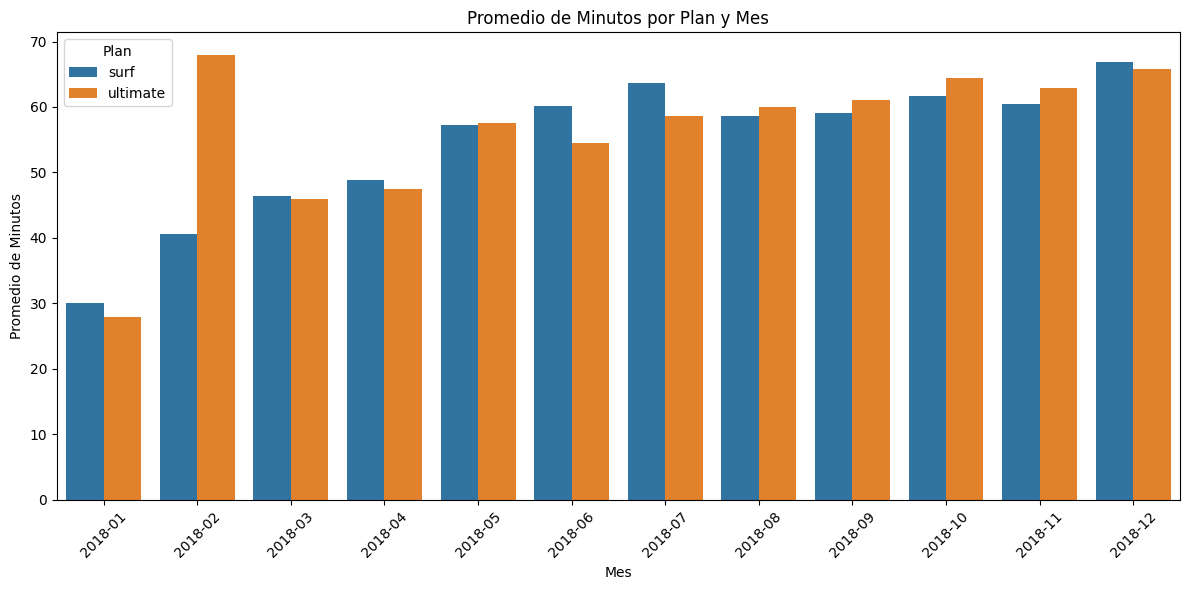

In [26]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
df_llamadas = no_llamadas.reset_index()
datos_llamadas = df_llamadas.merge(users, on='user_id')
datos_llamadas = datos_llamadas.rename(columns={0:'minutos'})
datos_llamadas['minutos'] = np.ceil(datos_llamadas['minutos'])
promedio_llamadas = datos_llamadas.groupby(['plan','year_month'])['minutos'].mean().rename('promedio')
df_prom_llamadas = promedio_llamadas.reset_index()
print(df_prom_llamadas)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_prom_llamadas, x='year_month', y='promedio', hue='plan')
plt.title('Promedio de Minutos por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Minutos')
plt.xticks(rotation=45)
plt.legend(title='Plan')
plt.tight_layout()
plt.show()

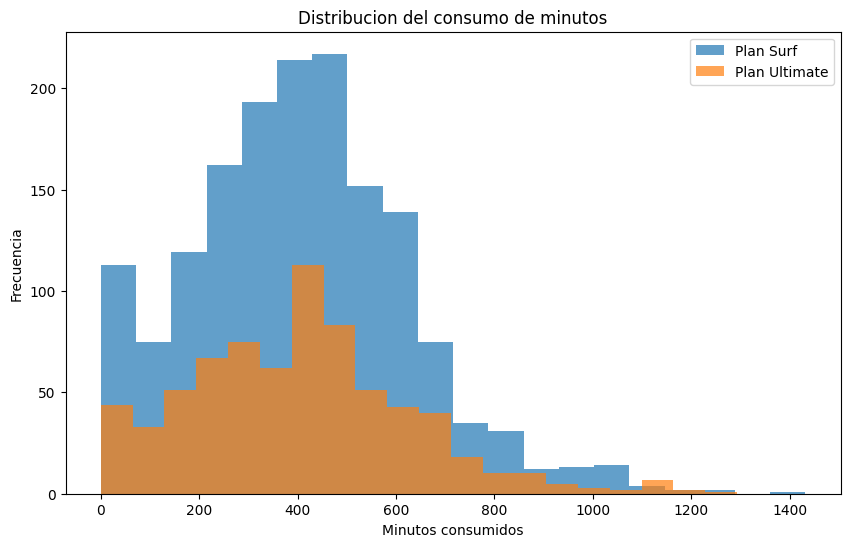

In [27]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.
#calls.head()
resultado_final.head()

plan_surf = resultado_final[resultado_final['plan']=='surf']
minutos_surf = plan_surf.groupby(['user_id','anio_mes'])['minutes'].sum()
plan_ultimate = resultado_final[resultado_final['plan']=='ultimate']
minutos_ultimate = plan_ultimate.groupby(['user_id','anio_mes'])['minutes'].sum()


#print(minutos_surf)


plt.figure(figsize=(10,6))
plt.hist(minutos_surf, bins=20, alpha=0.7, label='Plan Surf')
plt.hist(minutos_ultimate, bins=20, alpha=0.7,label='Plan Ultimate')
plt.title('Distribucion del consumo de minutos')
plt.xlabel('Minutos consumidos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()





<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Buen trabajo implemnentando los histogramas

</div>

In [28]:
# Calcula la media y la varianza de la duración mensual de llamadas.
resultado_final.head()
media_duration = resultado_final.groupby('anio_mes')['minutes'].mean()
#media_duration = df_duration['duration'].mean()
print(media_duration)
varianza_duration = resultado_final.groupby('anio_mes')['minutes'].var()
#varianza_duration = df_duration['duration'].var()
print(varianza_duration)



anio_mes
2018-01    186.833333
2018-02    346.333333
2018-03    302.771429
2018-04    328.239437
2018-05    386.653846
2018-06    397.255319
2018-07    420.541899
2018-08    395.843478
2018-09    402.624549
2018-10    419.566766
2018-11    413.595533
2018-12    452.010870
Freq: M, Name: minutes, dtype: float64
anio_mes
2018-01    12004.166667
2018-02    50999.809524
2018-03    38309.416807
2018-04    40866.813280
2018-05    47166.791636
2018-06    37856.720061
2018-07    56924.215931
2018-08    46744.822556
2018-09    43159.278815
2018-10    44942.889130
2018-11    46531.062368
2018-12    53716.324500
Freq: M, Name: minutes, dtype: float64


<AxesSubplot:title={'center':'Distribucion de la duración mensual surf'}>

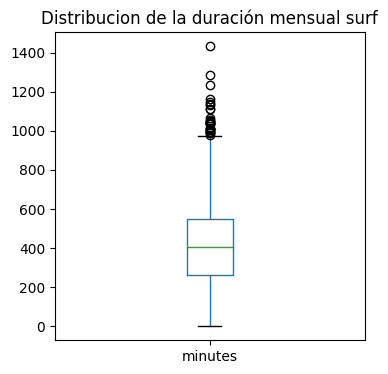

In [29]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
plan_surf['minutes'].plot(kind='box', figsize=(4,4), title='Distribucion de la duración mensual surf')

<AxesSubplot:title={'center':'Distribucion de la duración mensual ultimate'}>

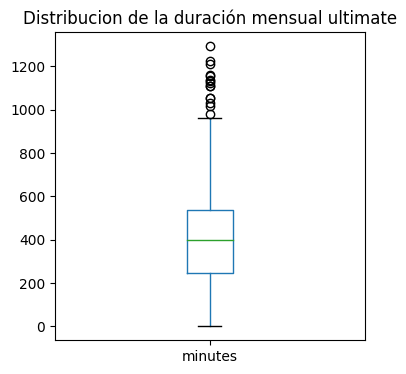

In [30]:
plan_ultimate['minutes'].plot(kind='box', figsize=(4,4), title='Distribucion de la duración mensual ultimate')


Aca podemos visualizar con claridad con respecto del ejercico anterior, podemos ver la media en 400 aprox, además podemos ver que la varianza nos da un valor alto, por lo cual es verdad analizando con esta imagen ya que nos dan valores muy dispersos o alejados de la media, entonces vemos que en ultimate los valores se alejan hasta 1300 en cambio en surf supera los 1400

### Mensajes

plan      year_month
surf      2018-01       21.000000
          2018-02       21.600000
          2018-03       21.937500
          2018-04       24.166667
          2018-05       33.017857
          2018-06       33.616438
          2018-07       35.945055
          2018-08       37.596774
          2018-09       39.523179
          2018-10       42.433862
          2018-11       40.553097
          2018-12       48.326772
ultimate  2018-01       20.666667
          2018-02       25.166667
          2018-03       34.714286
          2018-04       28.937500
          2018-05       44.333333
          2018-06       36.289474
          2018-07       41.212766
          2018-08       47.929825
          2018-09       45.901408
          2018-10       46.977528
          2018-11       47.601942
          2018-12       53.936508
Name: mensajes, dtype: float64


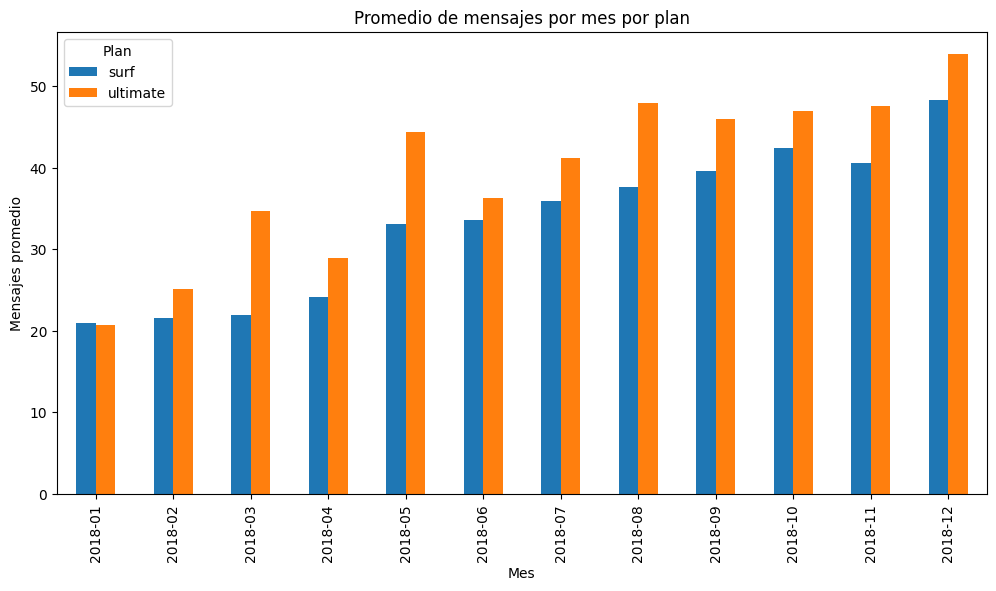

In [31]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
#print(messages_per_user)
df_messages = messages_per_user.reset_index()
df_messages = df_messages.rename(columns={0:'mensajes'})
mensajes_usuarios = df_messages.merge(users, on='user_id',how='outer')
#print(mensajes_usuarios)
grupos_planes_sms = mensajes_usuarios.groupby(['plan','year_month'])['mensajes'].mean()
print(grupos_planes_sms)
grupos_planes_sms.unstack(level=0).plot(kind='bar', figsize=(12,6))
plt.title('Promedio de mensajes por mes por plan')
plt.ylabel('Mensajes promedio')
plt.xlabel('Mes')
plt.legend(title='Plan')
plt.show()

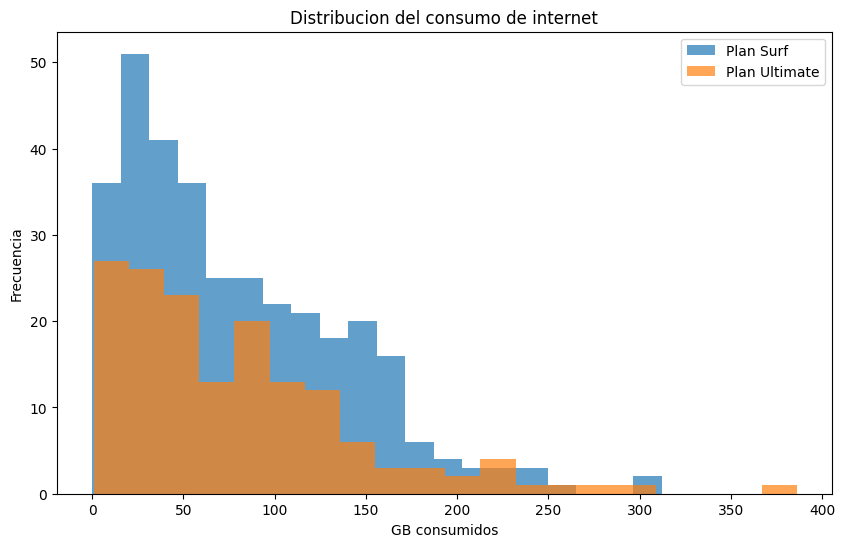

In [32]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
trafico_surf = plan_surf.groupby('user_id')['internet'].sum()
trafico_ultimate = plan_ultimate.groupby('user_id')['internet'].sum()
plt.figure(figsize=(10,6))
plt.hist(trafico_surf, bins=20, alpha=0.7, label='Plan Surf')
plt.hist(trafico_ultimate, bins=20, alpha=0.7,label='Plan Ultimate')
plt.title('Distribucion del consumo de internet')
plt.xlabel('GB consumidos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()


Aqui interpretamos que la mayoria de las personas que usan el plan surf, gastan mas datos en comparacion con el plan ultimate,aunque en ultimate tiene unos picos mas altos, pero esto no es todo lo que nos define, cabe resaltar que la grafica lo vemos anualmente y no mensual ya que el ejercicio solo pide el trafico por personas y por plan. Adicional vemos la necesidad de hacer mas analisis lo que es hallar promedio de cada uno, sacar la varianza.

### Internet

In [33]:
#internet_surf = df_trafico_plan[df_trafico_plan['plan']=='surf']['gb_used']
#internet_ultimate = df_trafico_plan[df_trafico_plan['plan']=='ultimate']['gb_used']
internet_surf = plan_surf['internet']
internet_ultimate = plan_ultimate['internet']
media_surf = internet_surf.mean()
media_ultimate = internet_ultimate.mean()

print(f'La media de Surf:{media_surf:.2f}GB')
print(f'La media de ultimate:{media_ultimate:.2f}GB')


La media de Surf:16.83GB
La media de ultimate:17.33GB


In [34]:
varianza_surf = internet_surf.var()
varianza_ultimate = internet_ultimate.var()

print(f'La varianza de Surf:{varianza_surf:.2f}GB')
print(f'La varianza ultimate:{varianza_ultimate:.2f}GB')


La varianza de Surf:59.47GB
La varianza ultimate:58.49GB


In [35]:
std_surf = internet_surf.std()
std_ultimate = internet_ultimate.std()

print(f'Desviacion estandar Surf:{std_surf:.2f}GB')
print(f'Desviacion estandar Ultimate:{std_ultimate:.2f}GB')

Desviacion estandar Surf:7.71GB
Desviacion estandar Ultimate:7.65GB


Con los resultados obtenidos de la desviación estandar veo que es baja, da entender que el consumo de los usuarios son muy similares

## Ingreso

In [36]:
ingreso_surf = plan_surf.groupby('user_id')['costo_total'].sum()
ingreso_ultimate = plan_ultimate.groupby('user_id')['costo_total'].sum()

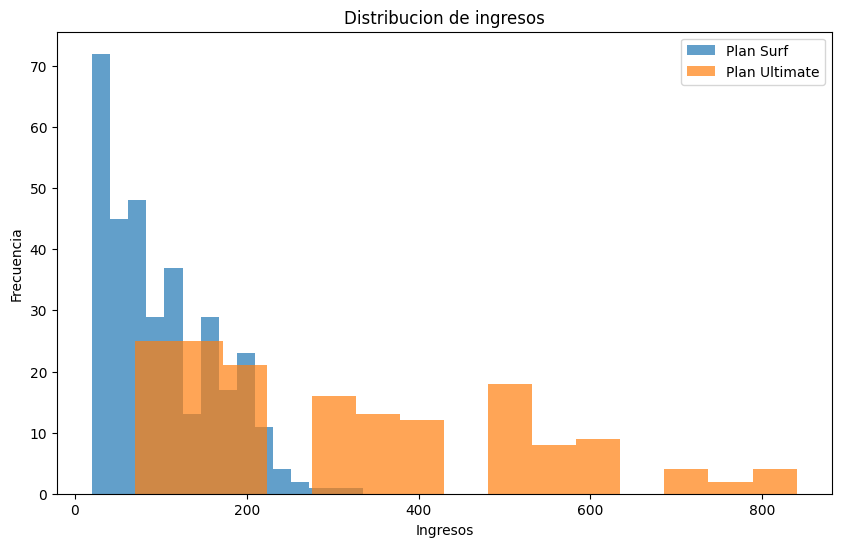

In [37]:
plt.figure(figsize=(10,6))
plt.hist(ingreso_surf, bins=15, alpha=0.7, label='Plan Surf')
plt.hist(ingreso_ultimate, bins=15, alpha=0.7,label='Plan Ultimate')
plt.title('Distribucion de ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

In [38]:
media_surf= plan_surf['costo_total'].mean()
media_ultimate= plan_ultimate['costo_total'].mean()
print(f'La media de Surf: ${media_surf:.2f}')
print(f'La media de Ultimate: ${media_ultimate:.2f}')
var_surf = plan_surf['costo_total'].var()
var_ultimate = plan_ultimate['costo_total'].var()
print(f'La varianza de Surf: ${var_surf:.2f}')
print(f'La varianza ultimate: ${var_ultimate:.2f}')
estandar_surf = plan_surf['costo_total'].std()
estandar_ultimate = plan_ultimate['costo_total'].std()
print(f'Desviacion estandar Surf: ${std_surf:.2f}')
print(f'Desviacion estandar Ultimate: ${std_ultimate:.2f}')


La media de Surf: $21.72
La media de Ultimate: $70.02
La varianza de Surf: $12.34
La varianza ultimate: $0.01
Desviacion estandar Surf: $7.71
Desviacion estandar Ultimate: $7.65


El plan Surf es el motor de ingresos principal y más lucrativo de la compañía. Sin embargo, este ingreso es volátil e impredecible a nivel de usuario, ya que algunos clientes pueden generar ingresos masivos, mientras que otros no. El plan Ultimate, aunque genera mucho menos ingreso por usuario, proporciona un flujo de ingresos más estable y predecible, lo que puede ser valioso para la planificación financiera, por el resultado de la varianza.

## Prueba las hipótesis estadísticas

In [39]:
# Prueba las hipótesis
#col_surf = resultado_final_surf['costo_total']

#col_ultimate = resultado_final_ultimate['costo_total']

alpha = 0.05
results = st.ttest_ind(ingreso_ultimate,ingreso_surf, equal_var=False)
print(f'valor p :{results.pvalue}')
if(results.pvalue<alpha):
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')

estadistico, p_valor = st.levene(ingreso_ultimate,ingreso_surf)
print(f'Estadísico de levene: {estadistico:.2f},p-valor: {p_valor:.2f}')

valor p :4.6864860778799484e-27
Rechazamos la hipotesis nula
Estadísico de levene: 245.24,p-valor: 0.00


En vista haciendo los calculos de la hipotesis nula entre los dos planes, podemos ver que son diferentes determinando desde un valor alpha 0.05

In [41]:
# Prueba las hipótesis
area = resultado_final[resultado_final['city'].str.contains('NY-NJ')]
no_area = resultado_final[~resultado_final['city'].str.contains('NY-NJ')]
col_area = area['costo_total']
col_noarea = no_area['costo_total']

alpha = 0.05
results = st.ttest_ind(col_area, col_noarea, equal_var=False)
print('valor p:',results.pvalue)
if(results.pvalue<alpha):
    print('Rechazamos la hipotesis nula')
else:
    print('No podemos rechazar la hipotesis nula')
estadistico, p_valor = st.levene(col_area,col_noarea)
print(f'Estadísico de levene: {estadistico:.2f},p-valor: {p_valor:.14f}')

valor p: 2.8212562834738342e-14
Rechazamos la hipotesis nula
Estadísico de levene: 48.30,p-valor: 0.00000000000475


Cambio comparando entre el area NY-NJ frente a las otras areas, sin separar los planes, podemos ver que se acerca al valor alpha sin embargo existe una diferencia estadisticamente significativa

## Conclusión general
Analizando entre los dos planes ambos tienen la capaciadad de vender el servicio, que es lo que pasa con el plan ultimate tiene una estabilidad, los clientes tienden usar todos los servicios como los mensajes, llamadas pero el tema de internet casi no llega al limite, en cuanto el plan surf veo que hay mas frecuencia en cada uno de los servicios, cabe resaltar que son algunos clientes que llegan a superar los limites del plan. Aun asi haciendo comparaciones, de diferentes planes existen la diferencia estadisticamente significativa, es decir que puede existir efectos o cambios respecto los ingresos promedios